In [ ]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [ ]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA',
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']


In [ ]:
# make_blob gives you back the X values of being the location of this data and y being a class label of this data.
# one of the parameters it make is the number of features which talks about the dimensionality of our data.
# For this purpose, let's choose 50. We can use larger dimensionality but it'll take slightly longer to run.
# 50 is good amount considering we wil transform this in two dimensional space, it's a good trade off.
# Centers parameters pertains to how munay centers of data or how many different clusters
X, y = make_blobs(n_features=50, centers=20, # this translates to our data will have 50 dimensions accross 20 different classes or clusters.
                  n_samples=20000, # you can choose more but it make slightly longer to run. If you choose less, it may not be enough to train a good model.
                  cluster_std=0.2, # the standard deviation of the point between each of the centers.
                  center_box=[-1, 1], # not strictly necessary. We'll just use this to constrain our centers within reasonable location.
                  random_state=17) # for the sake of reproducibility so we can have the same data produced if we run this notebook again.

In [ ]:
# check first item of X
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [ ]:
# split the dataset for testing and training
# in cetain ML apps,you might have a validation and a test set, in our case we are just worried about two differnet validations
# considering that we know our dataset is coming from a uniform distribution, we're relatively confident.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

# note that each centers could be located somewhere -1 and 1 in a square pattern in each of the 50 dimensions.

# scale the data
scaler = MinMaxScaler() # this will scale each feature. Meaning each dimension will be converted from its existing distribution to be a value between 0 and 1.

# fit the scaler and transform our test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
pca = PCA(n_components=2) # because we've got 50 dimension of our data that we want to bring down to two dimension.
pca.fit(X_train)

#get the result of our transformed data
res_pca = pca.transform(X_test)

In [ ]:
# check result
res_pca.shape

(2000, 2)

Text(0.5, 1.0, 'PCA Results')

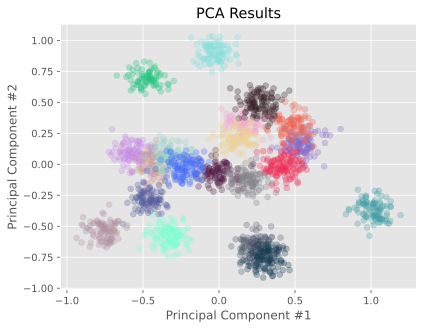

In [ ]:
# loop each different clusters
unique_labels = np.unique(y_test)

for index, unique_labels in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_labels]
    # plot the data
    plt.scatter(X_data[:,0],
                X_data[:,1], # y-values refers to second dimension
                alpha=0.3, # this gives point in our scatterplot a slide transparency value
                c=cols[index]) # refers to the list of color we created earlier

# what PCA does is, when given a dataset in high dimensional space, in our case,
# it will find the direction/vectors in the dataset with the highest variance.
# The first component wil have the highest variance and everything will be
# projected onto that component, othogonal to that you will find the next component
# which will be our principal component 2.
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

In [ ]:
# we'll use Regressor function because this is no longer a classification task
# because our inputs are real value and it kinda acts like regression task like
# you want to predict a vector values
autoencoder = MLPRegressor(alpha=1e-15,
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
                           random_state=1, max_iter=20000)
# fit our training data
autoencoder.fit(X_train, X_train) # our input will be train data and our output will also be our train data.

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [ ]:
W = autoencoder.coefs_ # W represents weight
biases = autoencoder.intercepts_

In [ ]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [ ]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [ ]:
# create a function where we can loop each of our ecoder weight and encoder biases
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)

    return res_ae

res_ae = encode(encoder_weights, encoder_biases, X_test) # X-test is our data that our model has not seen before training.

# This is our encoding function. Ths is what will take a 50 dimensional pice of data and convert it ot alist of 2 dimensional point

In [ ]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

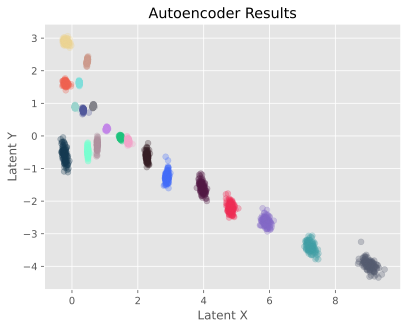

In [ ]:
# Now that we completed our encoding function, we can now visualize our dataset in a very similar way that we did with PCA
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test == unique_label]

    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [ ]:
# first, let's look at our original dataset.
silhouette_score(X_test, y_test)

0.6106327445141103

In [ ]:
# Let's check how our PCA has done
silhouette_score(res_pca, y_test)

0.3644947714111168

In [ ]:
# Now let's see how our autoencoder has done
silhouette_score(res_ae, y_test)

0.8020960810531794